Vamos começar esta aula sobre regressão logística usando um problema de classificação binária simples: como prever se um aluno será aprovado ou não com base em horas de estudo.

* **Variável independente (X):** Horas de estudo.
* **Variável dependente (y):** Aprovado (1) ou Reprovado (0).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dados = {
    "Horas_Estudo": [1, 2, 3, 4, 5, 6],
    "Aprovado": [0, 0, 0, 1, 1, 1]
}

## Passo 1: Função Logística
$P(y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}$

**Coeficientes hipotéticos**:
- $\beta_0 = -5 $
- $\beta_1 = 1.5 $

---

## Passo 2: Cálculo para X=4
$ z = -5 + 1.5 \times 4 = 1 $

$ P(y=1) = \frac{1}{1 + e^{-1}} $

**Contas passo a passo**:

 $ e^{-1} \approx 0.3679 $

 $ 1 + 0.3679 = 1.3679 $

 $ \frac{1}{1.3679} \approx 0.731 $


**Resultado**:
- Probabilidade de aprovação para 4 horas de estudo ≈ **73.1%**

---

## Passo 3: Ponto de Decisão (50%)
Encontre $X$ onde $ P(y=1) = 0.5$:

$ -5 + 1.5X = 0 $

$ 1.5X = 5 $

$ X = \frac{5}{1.5} \approx 3.33 $

**Interpretação**:
- Alunos que estudam **mais de 3.33 horas** têm >50% de chance de aprovação.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.DataFrame(dados)

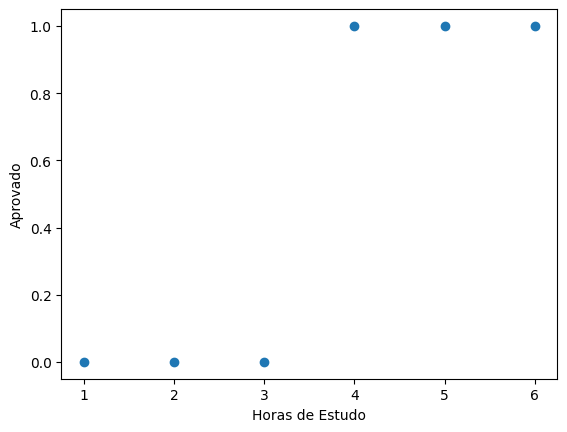

In [ ]:
plt.scatter(df['Horas_Estudo'], df['Aprovado'])
plt.xlabel('Horas de Estudo')
plt.ylabel('Aprovado')
plt.show()

Text(0, 0.5, 'Aprovado')

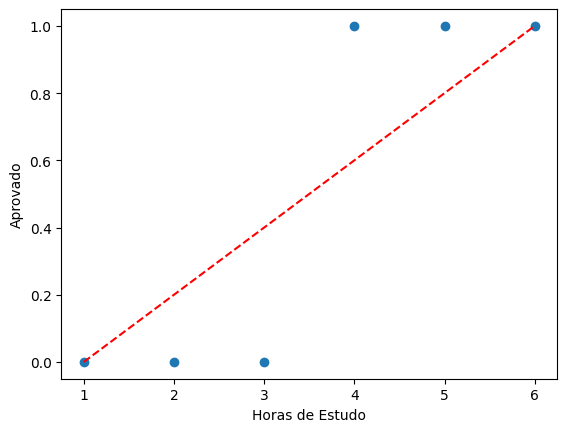

In [ ]:
plt.scatter(df['Horas_Estudo'], df['Aprovado'])
plt.plot([1, 6], [0.0, 1.0], linestyle='--', color='red')
plt.xlabel('Horas de Estudo')
plt.ylabel('Aprovado')

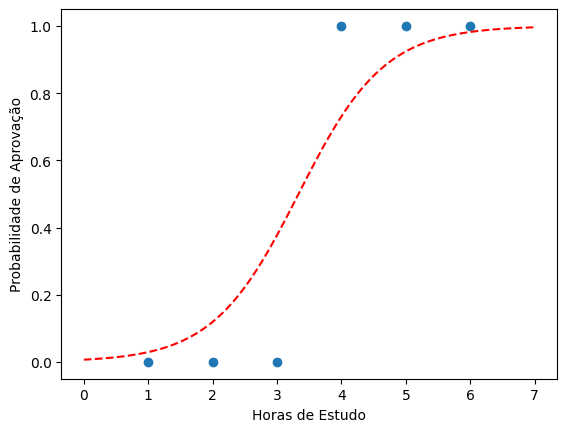

In [ ]:
import numpy as np
x_curva = np.linspace(0, 7, 100)

probabilidade = 1/(1 + np.exp(-(-5 + 1.5*x_curva)))

plt.scatter(df['Horas_Estudo'], df['Aprovado'])
plt.plot(x_curva, probabilidade, color='red', linestyle= '--')
plt.xlabel('Horas de Estudo')
plt.ylabel('Probabilidade de Aprovação')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

x= df["Horas_Estudo"].values.reshape(-1, 1)
y= df["Aprovado"]
modelo = LogisticRegression()
modelo.fit(x, y)

LogisticRegression()

In [ ]:
print("intercept", modelo.intercept_)
print("coeficiente", modelo.coef_)

intercept [-3.9223039]
coeficiente [[1.12069525]]


**Exercício:** Dado que agora encontramos os coeficientes reais dos dados, calcule manualmente: Encontre $X$ onde $ P(y=1) = 0.5$:



**Interpretação**:


$ -3.92 + 1.12X = 0 $

$ 1.12X = 3.92 $

$ X = \frac{3.92}{1.12} \approx 3.5
 $


In [ ]:
#vamos fazer a partir do modelo de regressao logistica induzido
print("Probabilidade para 4 horas:", modelo.predict_proba([[4]])[0][1])

print("Probabilidade da classe para 4 horas:", modelo.predict([[4]])[0])

Probabilidade para 4 horas: 0.6365629265347539
Probabilidade da classe para 4 horas: 1


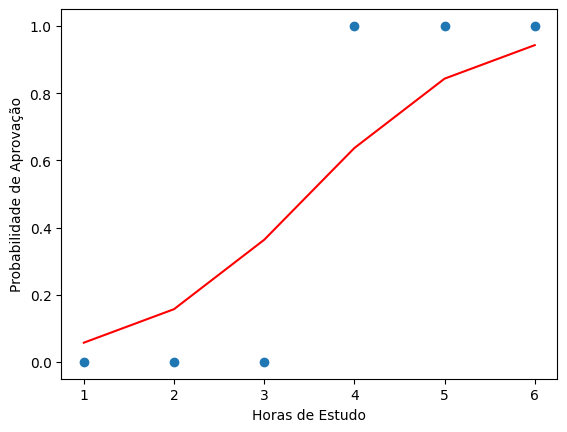

In [ ]:
plt.scatter(x, y)
plt.plot(x, modelo.predict_proba(x)[:, 1], color='red')
plt.xlabel('Horas de Estudo')
plt.ylabel('Probabilidade de Aprovação')
plt.show()

In [ ]:
dados_teste = {
    "Horas_Estudo": [6.5, 3.5, 4.5, 1.5, 5.5],
    "Aprovado": [0, 1, 1, 0, 1]
}
df_teste = pd.DataFrame(dados_teste)

In [ ]:
x_teste = df_teste["Horas_Estudo"].values.reshape(-1, 1)
df_teste["aprovado_Previsto"] = modelo.predict(x_teste)
df_teste["prob_aprovado"] = modelo.predict_proba(x_teste)[:, 1]


In [ ]:
df_teste

,Horas_Estudo,Aprovado,aprovado_Previsto,prob_aprovado
0,6.5,0,1,0.966503
1,3.5,1,1,0.500032
2,4.5,1,1,0.754142
3,1.5,0,0,0.096106
4,5.5,1,1,0.903917


In [ ]:
from sklearn.metrics import accuracy_score

print("Acurácia:", accuracy_score(df_teste["Aprovado"], df_teste["aprovado_Previsto"]))

Acurácia: 0.8


**Exercício 1:** Carregue os datasets ``dados_aprovacao_treino.csv`` e ``dados_aprovacao_teste.csv``. Analise quais são as colunas existentes e faça o treinamento do algoritmos de regressão logística. Em seguida, faça o teste do modelo de regressão induzido, utilizando o conjunto de dados de teste.

**Exercício 2:** avalie a necessidade de aplicar algum pré-processamento nos dados (identificação de outliers, normalização, desbalanceamento das classes, etc.) Em caso afirmativo, retreine e reavalie o modelo novamente. Lembre-se que o pré-processamento também precisa ser aplicado nos dados de teste.
Caso você verifique que nada disso é necessário, tente justificar o porquê.

Dicas:

* a regressão logísitca é robusta contra valores com escalas diferentes, ou seja, normalizar os dados tende a não ter tanto impacto assim neste algoritmo. Entretanto, isso não se aplica quando usamos regularização na regressão. Pesquise e estude mais sobre isso.

* a regressão logísitica também é robusta à outliers, mas não à prova. Então, sempre é válido averiguar sua existência

* ela é sensível ao desbalanceamento das classes. Se esse for o caso, pesquise e teste a biblioteca SMOTE que faz uma amostragem de forma facilitada.
  * from imblearn.over_sampling import SMOTE

In [ ]:
df_treino = pd.read_csv("dados_aprovacao_2variaveis_treino.csv")
df_teste = pd.read_csv("dados_aprovacao_2variaveis_teste.csv")

In [ ]:
df_teste.head()

,Horas_Estudo,Simulados_Realizados,Aprovado_REAL
0,4.4,12,1
1,7.5,12,1
2,6.4,9,1
3,3.7,8,1
4,5.1,5,1


In [ ]:
#treinar o modelo para regressao
x= df["Horas_Estudo"].values.reshape(-1, 1)
z= df["Aprovado"]
modelo_csv= LogisticRegression()
modelo_csv.fit(x, z)

LogisticRegression()

In [ ]:
print("intercept", modelo.intercept_)
print("coeficiente", modelo.coef_)


intercept [-3.9223039]
coeficiente [[1.12069525]]


In [ ]:
df_teste

,Horas_Estudo,Simulados_Realizados,Aprovado_REAL
0,4.4,12,1
1,7.5,12,1
2,6.4,9,1
3,3.7,8,1
4,5.1,5,1
5,8.5,9,1
6,2.4,9,1
7,5.4,9,1
8,7.9,16,1
9,4.7,11,1


In [ ]:
x_teste = df_teste["Horas_Estudo"].values.reshape(-1, 1)
y_teste = df_teste["Aprovado_REAL"]
df_teste["aprovado_Previsto"] = modelo.predict(x_teste)

In [ ]:
print("Acurácia:", accuracy_score(df_teste["Aprovado_REAL"], df_teste["aprovado_Previsto"]))

Acurácia: 0.95


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [ ]:

# Análise de desbalanceamento de classes
print(df_treino['Aprovado'].value_counts())


Aprovado
1    421
0     79
Name: count, dtype: int64


In [ ]:

smote = SMOTE(random_state=42)
x_treino_balanceado, y_treino_balanceado = smote.fit_resample(df_treino[["Horas_Estudo", "Nota_Prova"]], df_treino["Aprovado"])
df_treino_balanceado = pd.DataFrame(x_treino_balanceado, columns=["Horas_Estudo", "Nota_Prova"])
df_treino_balanceado["Aprovado_REAL"] = y_treino_balanceado

# Retreinando o modelo com os dados balanceados
x_treino = df_treino_balanceado[["Horas_Estudo", "Nota_Prova"]]
y_treino = df_treino_balanceado["Aprovado_REAL"]
modelo_balanceado = LogisticRegression()
modelo_balanceado.fit(x_treino, y_treino)

# Aplicando o mesmo pré-processamento aos dados de teste
x_teste = df_teste[["Horas_Estudo", "Nota_Prova"]]
y_teste = df_teste["Aprovado_REAL"]

# Fazendo previsões com o modelo treinado nos dados balanceados
df_teste["aprovado_Previsto"] = modelo_balanceado.predict(x_teste)

# Avaliando o modelo
print("Acurácia após balanceamento:", accuracy_score(df_teste["Aprovado_REAL"], df_teste["aprovado_Previsto"]))

KeyError: "['Nota_Prova'] not in index"